In [1]:
# Install necessary libraries
%pip install pandas numpy scikit-learn

# Import necessary libraries and modules
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression as OLS

In [6]:
# Load the dataset
df = pd.read_csv('./AmesHousing.csv')

df = df.drop_duplicates().reset_index(drop=True)

# Remove 'pids' and 'order' features
df = df.drop(['PID', 'Order'], axis=1)

# Display the first few rows to verify the changes
display(df.head())

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
# Check for missing values and sum them up for each column
missing_values = df.isnull().sum()

# Display the columns with missing values and their counts
display(missing_values[missing_values > 0])

,0
Lot Frontage,29
Alley,186
Mas Vnr Type,116
Mas Vnr Area,1
Bsmt Qual,2
Bsmt Cond,2
Bsmt Exposure,3
BsmtFin Type 1,2
BsmtFin Type 2,2
Fireplace Qu,101


In [8]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Fill missing values
df[categorical_cols] = df[categorical_cols].fillna('None')
df[numerical_cols] = df[numerical_cols].fillna(0)

# Verify that there are no more missing values
display(df.isnull().sum()[df.isnull().sum() > 0])

,0


In [10]:
# Impute 'Lot Frontage' with median per 'Neighborhood'
if 'Lot Frontage' in df.columns:
    df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.median()))

In [11]:
if 'Mas Vnr Area' in df.columns and df['Mas Vnr Area'].dtype != 'object':
    df.loc[df['Mas Vnr Type'] == 'None', 'Mas Vnr Area'] = 0
    df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0) # Fill any remaining numerical Mas Vnr Area NAs with 0


In [12]:
if 'Garage Yr Blt' in df.columns:
    df.loc[df['Garage Type'] == 'None', 'Garage Yr Blt'] = 0
    df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Year Built']) # Fill remaining with Year Built if still NA


In [13]:
remaining_na = df.isnull().sum()[df.isnull().sum() > 0]
if not remaining_na.empty:
    print("\nWarning: Some NA values still exist after primary imputation:")
    print(remaining_na)
    # Final catch-all for any straggling NAs (e.g., in newly created features or if a column was missed)
    for col in remaining_na.index:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())

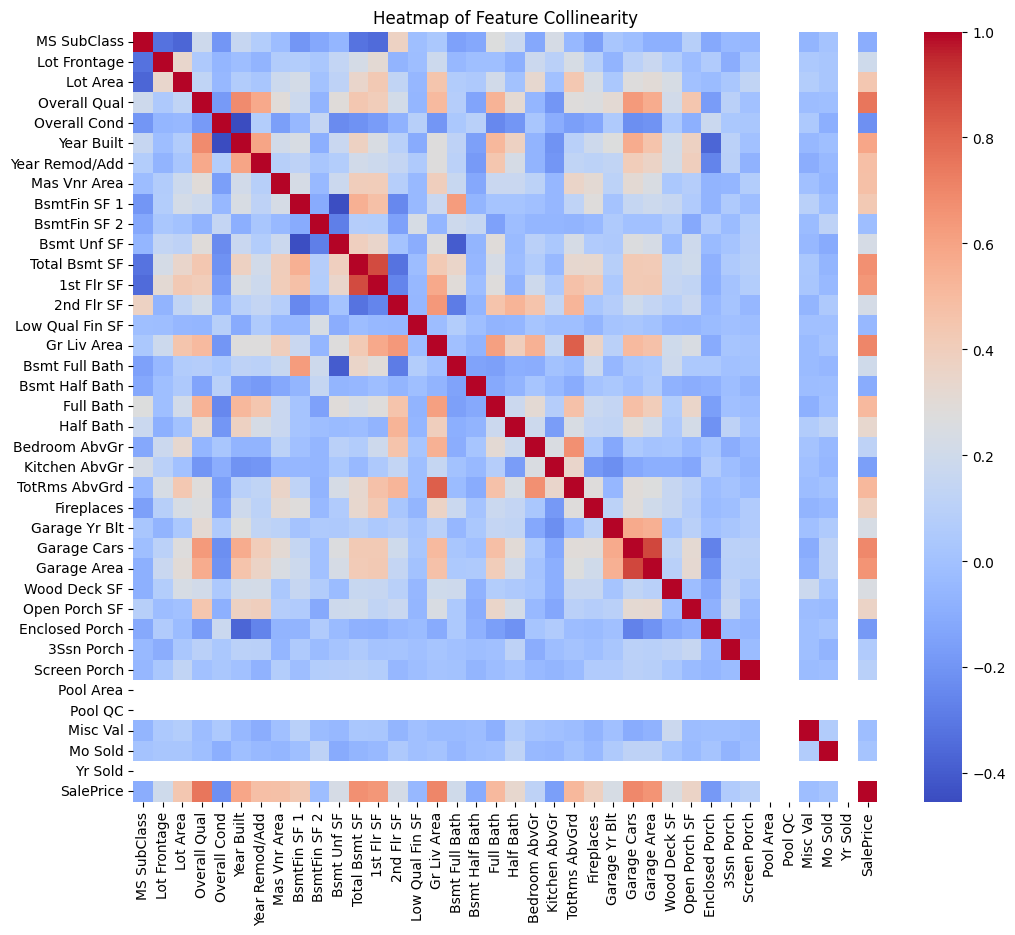

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Heatmap of Feature Collinearity')
plt.show()

In [17]:
# Train Lasso model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Lasso model
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Model Performance:")
print(f"RMSE: {rmse_lasso}")
print(f"MAE: {mae_lasso}")
print(f"R-squared: {r2_lasso}")

Lasso Model Performance:
RMSE: 66759.52453264102
MAE: 53346.65788136019
R-squared: 0.3834478259258556


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.237e+09, tolerance: 9.678e+07
  model = cd_fast.enet_coordinate_descent(


In [18]:
# Train Ridge model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge model
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Model Performance:")
print(f"RMSE: {rmse_ridge}")
print(f"MAE: {mae_ridge}")
print(f"R-squared: {r2_ridge}")

Ridge Model Performance:
RMSE: 38281.48300458271
MAE: 30919.773890799792
R-squared: 0.7972686692379425
